In [1]:
import pandas as pd

pre_df = pd.read_csv('pre_experiment.csv')
during_df = pd.read_csv('during_experiment.csv')
post_df = pd.read_csv('post_experiment.csv')


In [2]:
pre_df = pd.read_csv('pre_experiment.csv')

# View first few rows
pre_df.head()

# View column names
print(pre_df.columns.tolist())

# Basic summary
pre_df.info()

# Check for missing values
pre_df.isnull().sum()


['Timestamp', '1.How frequently do you engage with internet banking services each month?', '2.What types of devices do you commonly use to access internet banking services?\n(Select all that apply)', '3.Describe any security concerns you have with your current internet banking system.', '4.Have you had any security training or education regarding safe practices for internet\nbanking?', '5.What methods do you currently use to authenticate your identity with your bank\nonline?', '6.Rate your level of trust in the current security measures provided by your internet\nbanking service on a scale of 1 to 10.', '7.Are you familiar with the concept of behavioral biometrics?', '8.What are your expectations from a security system for internet banking in terms\nof privacy?', '9.Have you ever abandoned a transaction because of complicated or time-consuming\nsecurity processes?', '10.How willing are you to try new technologies for securing your online banking activities?']
<class 'pandas.core.frame.

Timestamp                                                                                                                         0
1.How frequently do you engage with internet banking services each month?                                                         0
2.What types of devices do you commonly use to access internet banking services?\n(Select all that apply)                         0
3.Describe any security concerns you have with your current internet banking system.                                             20
4.Have you had any security training or education regarding safe practices for internet\nbanking?                                 0
5.What methods do you currently use to authenticate your identity with your bank\nonline?                                         2
6.Rate your level of trust in the current security measures provided by your internet\nbanking service on a scale of 1 to 10.     0
7.Are you familiar with the concept of behavioral biometrics?               

In [3]:
# See data types
pre_df.dtypes

# View unique values in categorical fields
for col in pre_df.columns:
    print(f"{col}: {pre_df[col].unique()[:10]}")


Timestamp: ['2025/05/12 6:41:05 PM GMT+9' '2025/05/12 9:32:38 PM GMT+9'
 '2025/05/12 10:31:36 PM GMT+9' '2025/05/13 5:34:09 AM GMT+9'
 '2025/05/13 12:47:57 PM GMT+9' '2025/05/13 3:54:49 PM GMT+9'
 '2025/05/13 4:38:33 PM GMT+9' '2025/05/13 5:18:44 PM GMT+9'
 '2025/05/13 7:15:34 PM GMT+9' '2025/05/13 7:15:55 PM GMT+9']
1.How frequently do you engage with internet banking services each month?: ['6 to 20 times' 'Less than 5 times' 'More than 20 times']
2.What types of devices do you commonly use to access internet banking services?
(Select all that apply): ['Laptop' 'PC' 'Laptop;Smartphone' 'Smartphone;Laptop' 'Smartphone'
 'Smartphone;Laptop;PC']
3.Describe any security concerns you have with your current internet banking system.: [nan 'Fraudulent transactions' 'Data privacy' 'Identity theft']
4.Have you had any security training or education regarding safe practices for internet
banking?: ['Yes' 'No']
5.What methods do you currently use to authenticate your identity with your bank
online

In [4]:
# Rename columns cleanly
pre_df.columns = [
    "timestamp",
    "monthly_usage_frequency",
    "device_types_used",
    "security_concerns",
    "security_training",
    "authentication_methods",
    "trust_rating",
    "familiar_with_biometrics",
    "privacy_expectations",
    "abandoned_due_to_security",
    "willing_to_try_new_tech"
]


In [5]:
# Convert trust rating to numeric
pre_df['trust_rating'] = pd.to_numeric(pre_df['trust_rating'], errors='coerce')

# Check value counts for categorical questions
print(pre_df['monthly_usage_frequency'].value_counts())
print(pre_df['familiar_with_biometrics'].value_counts())
print(pre_df['willing_to_try_new_tech'].value_counts())


monthly_usage_frequency
6 to 20 times         26
Less than 5 times     23
More than 20 times    19
Name: count, dtype: int64
familiar_with_biometrics
No         32
Yes        18
Somehow    18
Name: count, dtype: int64
willing_to_try_new_tech
Very willing       52
Somehow willing    15
Not willing         1
Name: count, dtype: int64


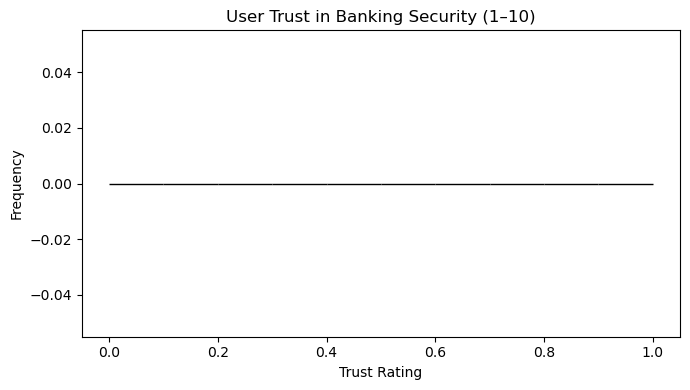

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot trust ratings
plt.figure(figsize=(7, 4))
sns.histplot(pre_df['trust_rating'], bins=10, kde=False)
plt.title("User Trust in Banking Security (1–10)")
plt.xlabel("Trust Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


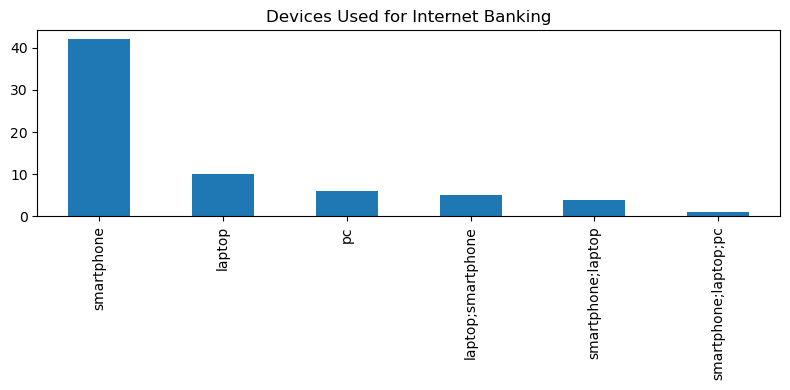

In [7]:
# Split multi-choice answers into individual rows
from sklearn.preprocessing import MultiLabelBinarizer

device_split = pre_df['device_types_used'].str.lower().str.split(',')
mlb = MultiLabelBinarizer()
device_df = pd.DataFrame(mlb.fit_transform(device_split), columns=mlb.classes_)
device_df.sum().sort_values(ascending=False).plot(kind='bar', figsize=(8,4), title="Devices Used for Internet Banking")
plt.tight_layout()
plt.show()


In [8]:
pre_df.to_csv("cleaned_pre_questionnaire.csv", index=False)


In [10]:
!pip install wordcloud


In [12]:
print(pre_df.columns.tolist())


['timestamp', 'monthly_usage_frequency', 'device_types_used', 'security_concerns', 'security_training', 'authentication_methods', 'trust_rating', 'familiar_with_biometrics', 'privacy_expectations', 'abandoned_due_to_security', 'willing_to_try_new_tech']


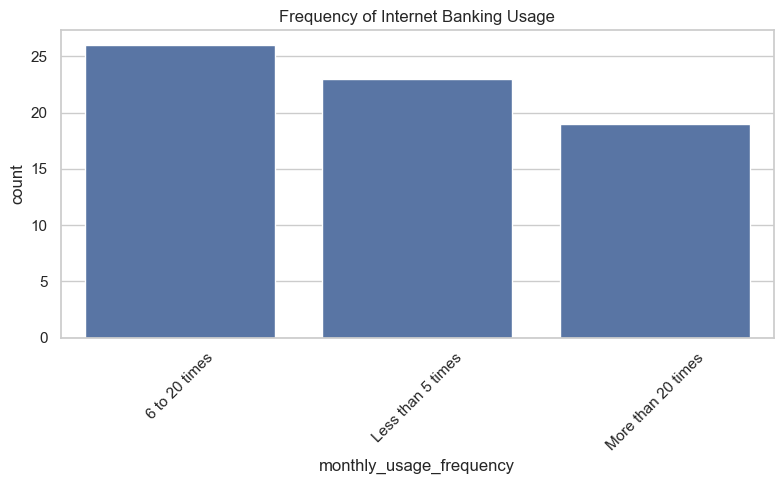

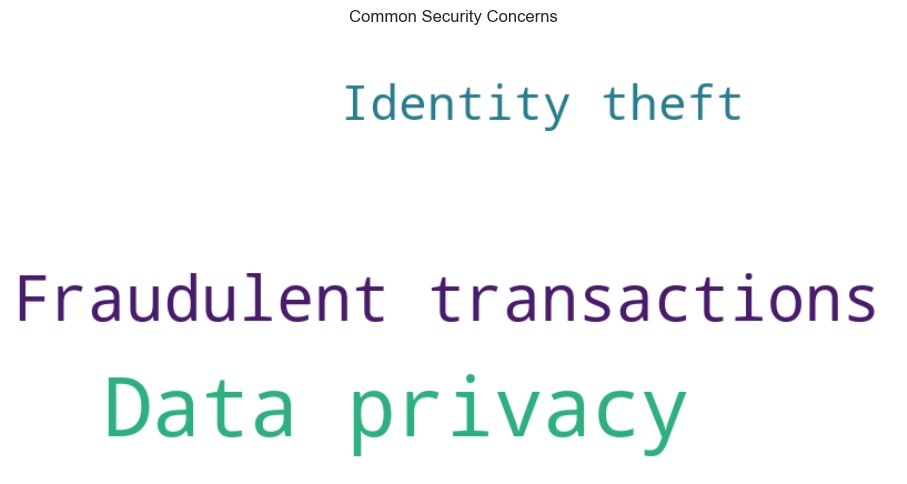

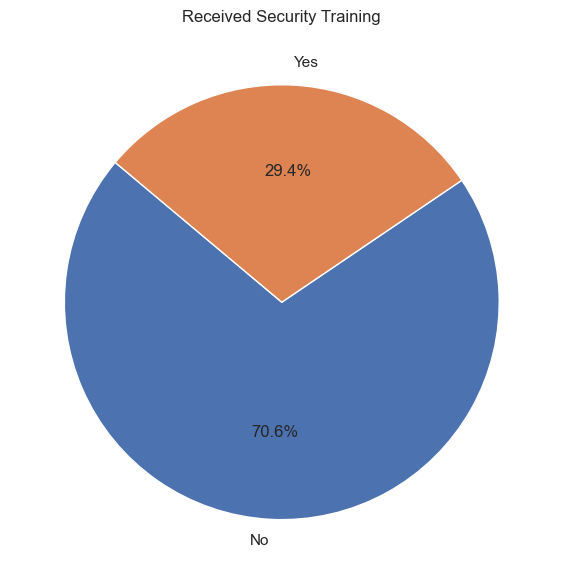

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

<Figure size 800x500 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# --- 1. Bar Plot: Frequency of Internet Banking Usage ---
plt.figure(figsize=(8, 5))
sns.countplot(data=pre_df, x='monthly_usage_frequency', order=pre_df['monthly_usage_frequency'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Frequency of Internet Banking Usage")
plt.tight_layout()
plt.savefig("fig_usage_frequency.pdf")
plt.show()

# --- 2. Word Cloud: Security Concerns ---
text = " ".join(str(item) for item in pre_df['security_concerns'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Security Concerns")
plt.tight_layout()
plt.savefig("fig_security_concerns_wordcloud.pdf")
plt.show()

# --- 3. Pie Chart: Security Training ---
training_counts = pre_df['security_training'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(training_counts, labels=training_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Received Security Training")
plt.tight_layout()
plt.savefig("fig_security_training_pie.pdf")
plt.show()

# --- 4. Histogram: Trust Rating ---
plt.figure(figsize=(8, 5))
sns.histplot(pre_df['trust_rating'].astype(int), bins=10, kde=True)
plt.title("Trust Level in Internet Banking Security (1–10)")
plt.xlabel("Trust Rating")
plt.tight_layout()
plt.savefig("fig_trust_rating_histogram.pdf")
plt.show()


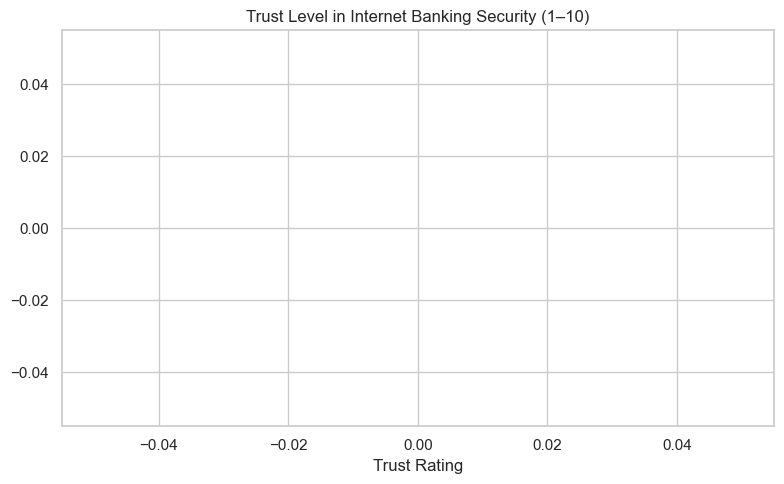

In [14]:
# --- 4. Histogram: Trust Rating (Cleaned) ---
plt.figure(figsize=(8, 5))

# Convert trust_rating to numeric, coercing errors and dropping NaNs
trust_clean = pd.to_numeric(pre_df['trust_rating'], errors='coerce').dropna()

sns.histplot(trust_clean, bins=10, kde=True)
plt.title("Trust Level in Internet Banking Security (1–10)")
plt.xlabel("Trust Rating")
plt.tight_layout()
plt.savefig("fig_trust_rating_histogram.pdf")
plt.show()


In [16]:
import pandas as pd

# Load the raw during-experiment questionnaire
during_df = pd.read_csv("during_experiment.csv")

# Display first few rows and basic info
print("=== First 5 Rows ===")
display(during_df.head())

print("\n=== Column Names ===")
print(during_df.columns.tolist())

print("\n=== Missing Values per Column ===")
print(during_df.isnull().sum())


=== First 5 Rows ===


,Timestamp,1.How would you describe your experience with the login process using behavioral\nbiometrics?,2.Did you experience any discomfort or concerns while the system was tracking your behavioral data?,3.How does the system’s response time during login and transactions compare with your previous experiences?,4.Were there any interruptions or issues that you faced during the session?,"5.On a scale from 1 to 10, how would you rate the intrusiveness of the behavioral biometrics system?",6.How well do you think the system recognized your unique patterns compared to traditional methods?,7.Did the system provide real-time feedback?,8.How did the system handle any errors or anomalies in your behavior patterns?,"9.During the session, were you required to take any additional steps for verification?",10.Describe any difficulties you encountered while performing typical banking tasks during the experiment.
0,2025/05/12 7:14:39 PM GMT+9,Very easy,No,About the same,No,1-3 (Not intrusive),Much better,Yes,Did not notice any errors,No,No difficulties
1,2025/05/12 9:56:52 PM GMT+9,Very easy,No,About the same,No,4-7 (Moderately intrusive),Somewhat better,Yes,Very well,No,No difficulties
2,2025/05/12 11:04:12 PM GMT+9,Neutral,No,Much faster,No,4-7 (Moderately intrusive),About the same,Yes,Did not notice any errors,No,No difficulties
3,2025/05/13 5:58:39 AM GMT+9,Neutral,No,Somewhat faster,No,4-7 (Moderately intrusive),About the same,No,Did not notice any errors,No,Some difficulties
4,2025/05/13 4:29:02 PM GMT+9,Somewhat easy,No,Much faster,No,1-3 (Not intrusive),Much better,Yes,Adequately,No,No difficulties



=== Column Names ===
['Timestamp', '1.How would you describe your experience with the login process using behavioral\nbiometrics?', '2.Did you experience any discomfort or concerns while the system was tracking your behavioral data?', '3.How does the system’s response time during login and transactions compare with your previous experiences?', '4.Were there any interruptions or issues that you faced during the session?', '5.On a scale from 1 to 10, how would you rate the intrusiveness of the behavioral biometrics system?', '6.How well do you think the system recognized your unique patterns compared to traditional methods?', '7.Did the system provide real-time feedback?', '8.How did the system handle any errors or anomalies in your behavior patterns?', '9.During the session, were you required to take any additional steps for verification?', '10.Describe any difficulties you encountered while performing typical banking tasks during the experiment.']

=== Missing Values per Column ===
Ti

In [17]:
# Clean column names: lowercase, underscores, remove line breaks
during_df.columns = [col.strip().lower().replace('\n', ' ').replace(' ', '_') for col in during_df.columns]

# Optional: review cleaned column names
print(during_df.columns.tolist())

# Save cleaned version
during_df.to_csv("cleaned_during_questionnaire.csv", index=False)
print("✅ Cleaned during-questionnaire saved as 'cleaned_during_questionnaire.csv'")


['timestamp', '1.how_would_you_describe_your_experience_with_the_login_process_using_behavioral_biometrics?', '2.did_you_experience_any_discomfort_or_concerns_while_the_system_was_tracking_your_behavioral_data?', '3.how_does_the_system’s_response_time_during_login_and_transactions_compare_with_your_previous_experiences?', '4.were_there_any_interruptions_or_issues_that_you_faced_during_the_session?', '5.on_a_scale_from_1_to_10,_how_would_you_rate_the_intrusiveness_of_the_behavioral_biometrics_system?', '6.how_well_do_you_think_the_system_recognized_your_unique_patterns_compared_to_traditional_methods?', '7.did_the_system_provide_real-time_feedback?', '8.how_did_the_system_handle_any_errors_or_anomalies_in_your_behavior_patterns?', '9.during_the_session,_were_you_required_to_take_any_additional_steps_for_verification?', '10.describe_any_difficulties_you_encountered_while_performing_typical_banking_tasks_during_the_experiment.']
✅ Cleaned during-questionnaire saved as 'cleaned_during_ques

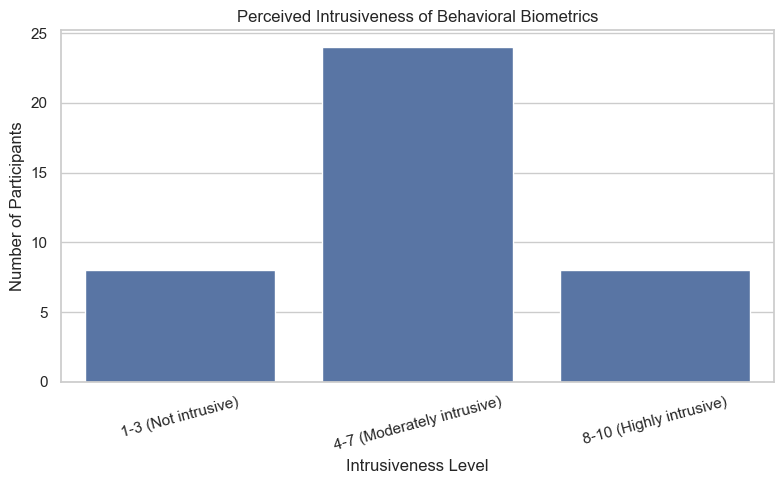

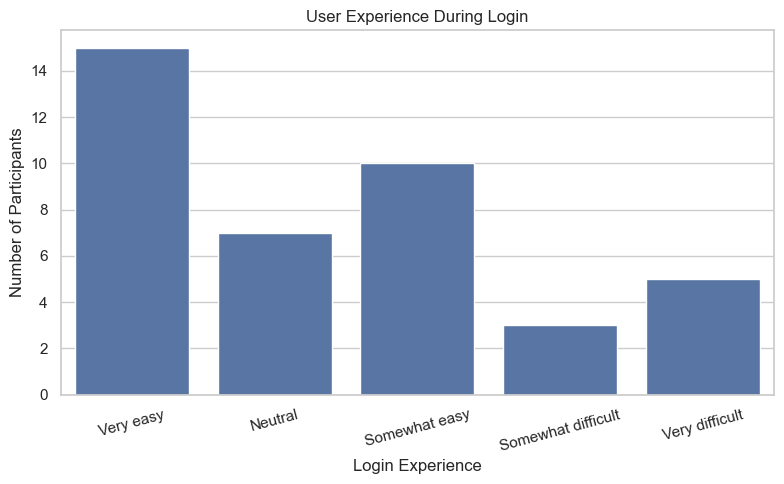

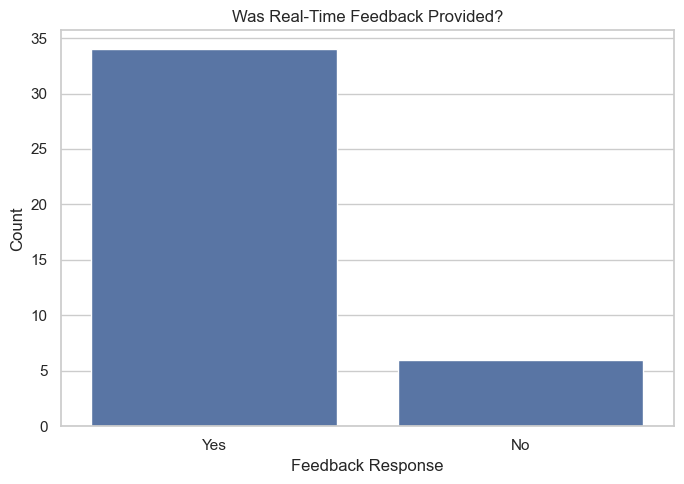

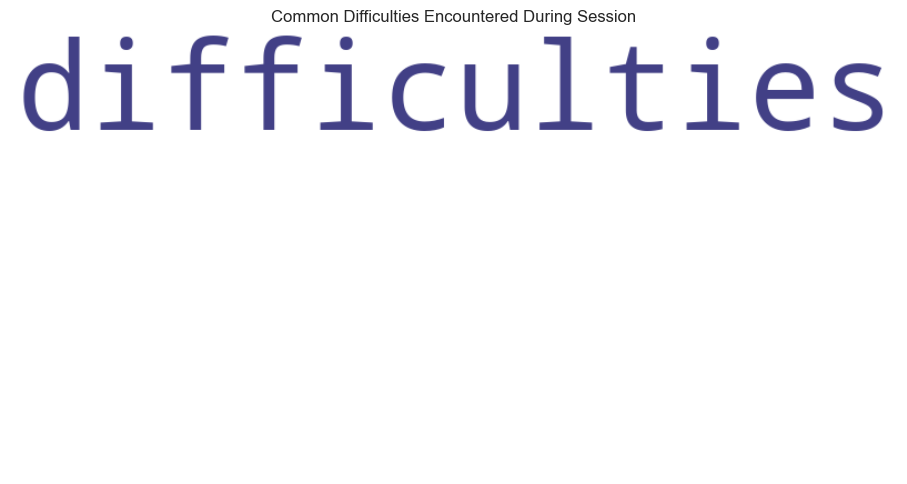

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load cleaned file
during_df = pd.read_csv("cleaned_during_questionnaire.csv")

# Set common style
sns.set(style="whitegrid")

# --- 1. Bar Plot: Intrusiveness Rating ---
plt.figure(figsize=(8, 5))
sns.countplot(
    data=during_df,
    x='5.on_a_scale_from_1_to_10,_how_would_you_rate_the_intrusiveness_of_the_behavioral_biometrics_system?',
    order=['1-3 (Not intrusive)', '4-7 (Moderately intrusive)', '8-10 (Highly intrusive)']
)
plt.title("Perceived Intrusiveness of Behavioral Biometrics")
plt.xlabel("Intrusiveness Level")
plt.ylabel("Number of Participants")
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig("intrusiveness_rating.pdf")
plt.show()

# --- 2. Bar Plot: Login Experience ---
plt.figure(figsize=(8, 5))
sns.countplot(
    data=during_df,
    x='1.how_would_you_describe_your_experience_with_the_login_process_using_behavioral_biometrics?'
)
plt.title("User Experience During Login")
plt.xlabel("Login Experience")
plt.ylabel("Number of Participants")
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig("login_experience.pdf")
plt.show()

# --- 3. Bar Plot: Real-Time Feedback ---
plt.figure(figsize=(7, 5))
sns.countplot(
    data=during_df,
    x='7.did_the_system_provide_real-time_feedback?'
)
plt.title("Was Real-Time Feedback Provided?")
plt.xlabel("Feedback Response")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("realtime_feedback.pdf")
plt.show()

# --- 4. Word Cloud: Difficulties Encountered ---
text_data = " ".join(during_df['10.describe_any_difficulties_you_encountered_while_performing_typical_banking_tasks_during_the_experiment.'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Difficulties Encountered During Session")
plt.tight_layout()
plt.savefig("difficulties_wordcloud.pdf")
plt.show()


In [19]:
import pandas as pd

# Load data
post_df = pd.read_csv("post_experiment.csv")

# Preview first rows
print("=== First 5 Rows ===")
print(post_df.head())

# Preview column names
print("\n=== Column Names ===")
print(post_df.columns.tolist())

# Check for missing values
print("\n=== Missing Values per Column ===")
print(post_df.isna().sum())


=== First 5 Rows ===
                      Timestamp  \
0   2025/05/12 9:14:23 PM GMT+9   
1  2025/05/12 10:20:40 PM GMT+9   
2  2025/05/12 11:06:33 PM GMT+9   
3   2025/05/13 6:05:35 AM GMT+9   
4   2025/05/13 6:13:39 AM GMT+9   

  1.How secure did you feel using the behavioral biometrics compared to traditional methods?  \
0                                   Much more secure                                           
1                                   Much more secure                                           
2                               Somewhat more secure                                           
3                                        Less secure                                           
4                                     About the same                                           

  2.Would you recommend the integration of this behavioral biometrics system to other users?  \
0                                         Definitely                                           

In [20]:
# Step 1: Clean column names
post_df.columns = [col.strip().lower().replace(' ', '_').replace('\n', '_') for col in post_df.columns]
post_df.columns = [col.replace('?', '').replace('.', '').replace('__', '_') for col in post_df.columns]

# Step 2: Save cleaned file
post_df.to_csv("cleaned_post_questionnaire.csv", index=False)
print("✅ Cleaned post-questionnaire saved as 'cleaned_post_questionnaire.csv'")


✅ Cleaned post-questionnaire saved as 'cleaned_post_questionnaire.csv'


In [24]:
print(post_df.columns.tolist())


['timestamp', '1how_secure_did_you_feel_using_the_behavioral_biometrics_compared_to_traditional_methods', '2would_you_recommend_the_integration_of_this_behavioral_biometrics_system_to_other_users', '3how_likely_are_you_to_use_this_system_if_it_becomes_a_standard_security_feature_for_internet_banking', '4what_was_the_most_positive_aspect_of_using_this_new_system', '5what_was_the_least_satisfying_aspect_of_using_this_new_system', '6on_a_scale_from_1_to_10,_how_would_you_rate_your_overall_satisfaction_with_this_behavioral_biometrics_system', '7did_using_the_system_change_your_perception_of_security_in_internet_banking', '8what_improvements_or_additional_features_would_make_you_more_comfortable_using_this_system', '9how_confident_are_you_that_the_behavioral_biometrics_can_protect_your_account_from_unauthorized_access', '10would_you_prefer_this_behavioral_biometric_system_to_be_optional_or_mandatory_for_all_your_internet_banking_activities']


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Load the cleaned post-questionnaire data
post_df = pd.read_csv("cleaned_post_questionnaire.csv")

# Open PDF writer
with PdfPages("post_questionnaire_visuals.pdf") as pdf:

    # 1. Satisfaction Rating Distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(data=post_df, x='6on_a_scale_from_1_to_10,_how_would_you_rate_your_overall_satisfaction_with_this_behavioral_biometrics_system')
    plt.xticks(rotation=45)
    plt.title("Overall Satisfaction with Behavioral Biometrics System")
    plt.xlabel("Satisfaction Level")
    plt.ylabel("Count")
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # 2. Confidence in Security
    plt.figure(figsize=(8, 5))
    sns.countplot(data=post_df, x='9how_confident_are_you_that_the_behavioral_biometrics_can_protect_your_account_from_unauthorized_access')
    plt.xticks(rotation=45)
    plt.title("Confidence in Biometrics Protecting Account")
    plt.xlabel("Confidence Level")
    plt.ylabel("Count")
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # 3. Recommendation Likelihood
    plt.figure(figsize=(8, 5))
    sns.countplot(data=post_df, x='2would_you_recommend_the_integration_of_this_behavioral_biometrics_system_to_other_users')
    plt.xticks(rotation=45)
    plt.title("Would Recommend Behavioral Biometrics System")
    plt.xlabel("Response")
    plt.ylabel("Count")
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # 4. Preference for Optional vs Mandatory
    plt.figure(figsize=(8, 5))
    sns.countplot(data=post_df, x='10would_you_prefer_this_behavioral_biometric_system_to_be_optional_or_mandatory_for_all_your_internet_banking_activities')
    plt.xticks(rotation=45)
    plt.title("Preference: Optional or Mandatory")
    plt.xlabel("Preference")
    plt.ylabel("Count")
    plt.tight_layout()
    pdf.savefig()
    plt.close()


In [26]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

# Load cleaned post-questionnaire data
post_df = pd.read_csv("cleaned_post_questionnaire.csv")

# Open PDF writer
with PdfPages("post_pie_questionnaire_visuals.pdf") as pdf:

    # 1. Pie Chart: Confidence in Biometrics Protecting Account
    plt.figure(figsize=(6, 6))
    confidence_counts = post_df['9how_confident_are_you_that_the_behavioral_biometrics_can_protect_your_account_from_unauthorized_access'].value_counts()
    plt.pie(confidence_counts, labels=confidence_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title("Confidence in Biometrics Protecting Account")
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # 2. Pie Chart: Preference for Optional vs Mandatory Use
    plt.figure(figsize=(6, 6))
    preference_counts = post_df['10would_you_prefer_this_behavioral_biometric_system_to_be_optional_or_mandatory_for_all_your_internet_banking_activities'].value_counts()
    plt.pie(preference_counts, labels=preference_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title("Preference: Optional vs Mandatory Use")
    plt.tight_layout()
    pdf.savefig()
    plt.close()


In [27]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

# Load the cleaned post-questionnaire data
post_df = pd.read_csv("cleaned_post_questionnaire.csv")

# Open PDF writer
with PdfPages("post_allpiequestionnaire_visuals.pdf") as pdf:

    # 1. Pie Chart: Overall Satisfaction
    plt.figure(figsize=(6, 6))
    satisfaction_counts = post_df['6on_a_scale_from_1_to_10,_how_would_you_rate_your_overall_satisfaction_with_this_behavioral_biometrics_system'].value_counts()
    plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title("Overall Satisfaction with Behavioral Biometrics System")
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # 2. Pie Chart: Confidence in Biometrics
    plt.figure(figsize=(6, 6))
    confidence_counts = post_df['9how_confident_are_you_that_the_behavioral_biometrics_can_protect_your_account_from_unauthorized_access'].value_counts()
    plt.pie(confidence_counts, labels=confidence_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title("Confidence in Biometrics Protecting Account")
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # 3. Pie Chart: Would Recommend System
    plt.figure(figsize=(6, 6))
    recommend_counts = post_df['2would_you_recommend_the_integration_of_this_behavioral_biometrics_system_to_other_users'].value_counts()
    plt.pie(recommend_counts, labels=recommend_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title("Would Recommend Behavioral Biometrics System")
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # 4. Pie Chart: Optional vs Mandatory Use
    plt.figure(figsize=(6, 6))
    preference_counts = post_df['10would_you_prefer_this_behavioral_biometric_system_to_be_optional_or_mandatory_for_all_your_internet_banking_activities'].value_counts()
    plt.pie(preference_counts, labels=preference_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title("Preference: Optional vs Mandatory Use")
    plt.tight_layout()
    pdf.savefig()
    plt.close()
